In [76]:
import pandas as pd
df = pd.read_csv('../Data/output.csv', header = None)
df

,0,1,2,3,4,5
0,Node: 0,Time: +4s,10.1.1.25,10.1.1.25,1,1
1,Node: 0,Time: +4s,10.1.1.26,10.1.1.26,1,1
2,Node: 0,Time: +4s,10.1.1.29,10.1.1.29,1,1
3,Node: 0,Time: +4s,10.1.1.31,10.1.1.31,1,1
4,Node: 0,Time: +4s,10.1.1.33,10.1.1.33,1,1
...,...,...,...,...,...,...
24310,Node: 47,Time: +98s,10.1.1.14,10.1.1.14,1,1
24311,Node: 47,Time: +98s,10.1.1.17,10.1.1.17,1,1
24312,Node: 47,Time: +98s,10.1.1.34,10.1.1.34,1,1
24313,Node: 48,Time: +98s,10.1.1.46,10.1.1.46,1,1


In [106]:
df=pd.read_csv('../../routes.csv', header = None)
df=df[~(df[0]=='Node')]
df.dropna(axis=0,inplace = True)
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5
0,0,+3s,10.1.0.6,10.1.0.6,1,1
1,0,+3s,10.1.0.9,10.1.0.9,1,1
2,0,+3s,10.1.0.13,10.1.0.13,1,1
3,0,+3s,10.1.0.14,10.1.0.14,1,1
4,0,+3s,10.1.0.15,10.1.0.15,1,1
...,...,...,...,...,...,...
14863,29,+50s,10.2.0.5,10.2.0.1,1,2
14864,29,+50s,10.2.0.6,10.2.0.8,1,2
14865,29,+50s,10.2.0.7,10.2.0.4,1,2
14866,29,+50s,10.2.0.8,10.2.0.8,1,1


In [107]:
dic = {}
for index in range(df.shape[0]):
    t = eval(df[1][index][1: -1])
    startNode = eval(df[0][index]) + 1
    nextNode = eval(df[3][index][7:])
    nowDistance = df[5][index]
    dic.setdefault(t, {}).setdefault(startNode, []).append(nextNode)
dic[4]

{1: [6, 9, 13, 14, 15, 16, 20],
 2: [8, 15, 17],
 4: [19],
 5: [17],
 6: [1, 9, 15, 16, 20],
 8: [2, 15, 17],
 9: [1, 6, 13, 16, 20],
 10: [11, 19],
 11: [10],
 12: [18],
 13: [1, 9, 14, 16],
 14: [1, 13],
 15: [1, 2, 6, 8, 17, 20],
 16: [1, 6, 9, 13, 20],
 17: [2, 5, 8, 15],
 18: [12],
 19: [4, 10],
 20: [1, 6, 9, 15, 16],
 21: [4, 5, 6, 8, 10],
 22: [3, 4, 5, 6, 7, 9],
 23: [2, 7],
 24: [1, 2, 5, 6, 7, 8],
 25: [1, 2, 4, 6, 7],
 26: [1, 2, 4, 5, 7],
 27: [2, 3, 4, 5, 6],
 28: [1, 4, 10],
 29: [2],
 30: [1, 8]}

In [111]:
import networkx as nx
import networkx.algorithms.components as com
G = nx.MultiDiGraph()
G.add_nodes_from(range(1, 51))
n = G.number_of_nodes()
C = []
for t in dic:
    for startV in dic[t]:
        for endV in dic[t][startV]:
            keys = G.add_edge(startV, endV)
    w = com.number_weakly_connected_components(G)
    #print(w)
    sum = 0
    for index in com.weakly_connected_components(G):
        subG = G.subgraph(index)
        subN = subG.number_of_nodes()
        #print('subG\'s number:', subG.number_of_nodes())
        averShortestLenOfSubG = nx.average_shortest_path_length(subG)
        #print(averShortestLenOfSubG)
        sum += averShortestLenOfSubG * subN
    C.append(n / (w * sum))
print(C)
print(len(C))

[0.09499014916971574, 0.09499014916971574, 0.09283454820519874, 0.09283454820519874, 0.09419866172935751, 0.09419866172935751, 0.0949760922250606, 0.0949760922250606, 0.04431811235405587, 0.04431811235405587, 0.04159495123350545, 0.04159495123350545, 0.036668942670004805, 0.036668942670004805, 0.036923860453272214, 0.036923860453272214, 0.03708250217380185, 0.03708250217380185, 0.03708250217380185, 0.03708250217380185, 0.04073605843517348, 0.04073605843517348, 0.044923629829290206, 0.044923629829290206, 0.044982162246005895, 0.044982162246005895, 0.048183963047884894, 0.048183963047884894, 0.04828504828504829, 0.04828504828504829, 0.05415499533146592, 0.05415499533146592, 0.05537098560354374, 0.05537098560354374, 0.05659640905542545, 0.05659640905542545, 0.05659640905542545, 0.05659640905542545, 0.05682931608857535, 0.05682931608857535, 0.0568761277163254, 0.0568761277163254, 0.05711134743392808, 0.05711134743392808, 0.05802320928371348, 0.05802320928371348, 0.05802320928371348, 0.0580

## 连通系数

$$
C = \cfrac{1}{\omega \sum_{i = 1}^{\omega} \cfrac{N_i}{N} l_i}
$$

 $C$ 为网络的连通系数，其中 $ω$ 为网络**连通分支数**， $N_i$为第 $i$ 个**连通分支中节点数目**， $N$ 为网络中**节点总数目**， $l_i$ 为第 $i$ 个**连通分支的平均最短路径**，**即该连通分支中任意两个节点之间最短连接距离的平均值**

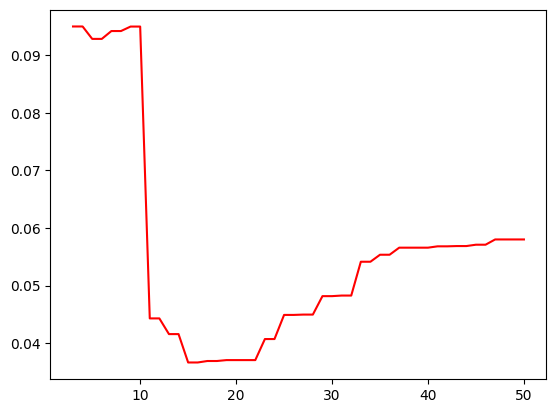

In [109]:
import matplotlib.pyplot as plt
x_time = []
for i in range(3, 51, 1):
    x_time.append(i)
plt.plot(x_time, C, color = 'red', label = 'connectivityCoefficient')

plt.show()

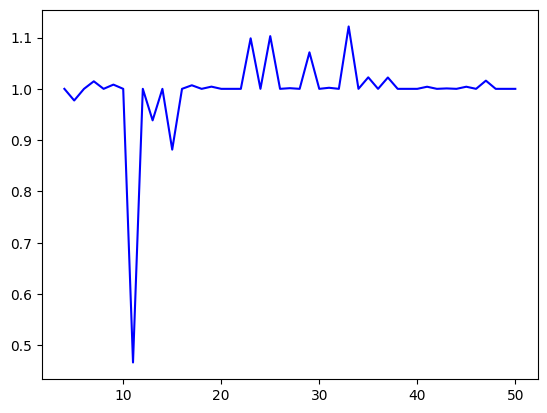

In [116]:
x_time = []
for i in range(4, 51, 1):
    x_time.append(i)
cmp = []
for i in range(0, len(C)-1):
    cmp.append(C[i + 1]/C[i])
plt.plot(x_time,cmp,color = 'blue', label = 'compare')

plt.show()